#**Homework 2 - Power Plant**#

**Combined Cycle Power Plant Data Set** 

The dataset contains data points collected from a Combined Cycle Power Plant over  6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant. 

a) Download the Combined Cycle Power Plant data1 from: 
https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant 

In [ ]:
# Power Plant Data
# Import libraries

# Import Pandas 
import pandas as pd 
pd.__version__

# Import Numpy
import numpy as np

# Import Print Functions
from __future__ import print_function

# Import Seaborn
import seaborn as sns

import matplotlib.pyplot as plt


# Set the print options
pd.options.display.float_format = '${:,.2f}'.format

# Column Data Labels:  
# Features consist of hourly average ambient variables Temperature (AT), Ambient 
# Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the 
# net hourly power plant electrical energy output (PE) of the plant.

col_Names=["AT","V","AP","RH","PE"]

# Load data from Github - Public data, Raw
url = 'https://raw.githubusercontent.com/allen-ceo-ai/INFCourse/master/Folds5x2_pp_sheet1.csv'

# Read "comma delimited" data "Folds5x2_pp_sheet1" For Power Plant 
# Folds5x2_pp_sheet1 = pd.read_csv(url,names=col_Names)
Folds5x2_pp_sheet1 = pd.read_csv(url)

# Assign data to a dataframe
df1=pd.DataFrame(data=Folds5x2_pp_sheet1)
## df1=df1.iloc[1:]

# Print Column Names and data
print(df1.columns)
print(df1)



Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')
         AT      V        AP     RH      PE
0    $14.96 $41.76 $1,024.07 $73.17 $463.26
1    $25.18 $62.96 $1,020.04 $59.08 $444.37
2     $5.11 $39.40 $1,012.16 $92.14 $488.56
3    $20.86 $57.32 $1,010.24 $76.64 $446.48
4    $10.82 $37.50 $1,009.23 $96.62 $473.90
...     ...    ...       ...    ...     ...
9563 $16.65 $49.69 $1,014.01 $91.00 $460.03
9564 $13.19 $39.18 $1,023.67 $66.78 $469.62
9565 $31.32 $74.33 $1,012.92 $36.48 $429.57
9566 $24.48 $69.45 $1,013.86 $62.39 $435.74
9567 $21.60 $62.52 $1,017.23 $67.87 $453.28

[9568 rows x 5 columns]


**b) Exploring the data:**

i) How many rows are in this data set? How many columns? What do the rows and columns represent?

ii) Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings. 

iii) What are the mean, the median, range, first and third quartiles, and in- terquartile ranges of each of the variables in the dataset? Summarize them in a table. 

(9568, 5)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

,AT,V,AP,RH,PE
count,"$9,568.00","$9,568.00","$9,568.00","$9,568.00","$9,568.00"
mean,$19.65,$54.31,"$1,013.26",$73.31,$454.37
std,$7.45,$12.71,$5.94,$14.60,$17.07
min,$1.81,$25.36,$992.89,$25.56,$420.26
25%,$13.51,$41.74,"$1,009.10",$63.33,$439.75
50%,$20.34,$52.08,"$1,012.94",$74.97,$451.55
75%,$25.72,$66.54,"$1,017.26",$84.83,$468.43
max,$37.11,$81.56,"$1,033.30",$100.16,$495.76


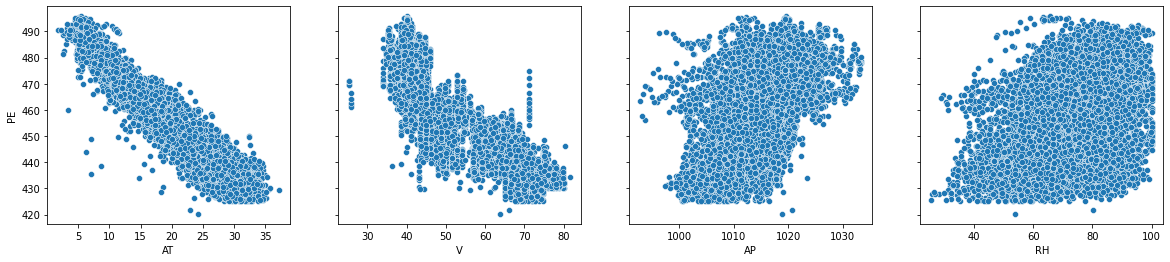

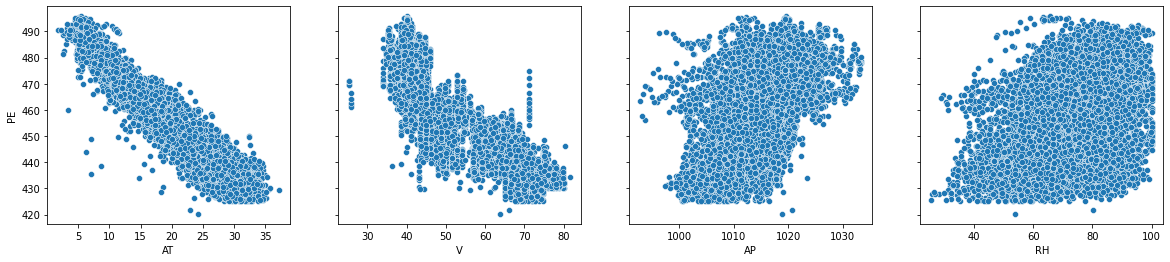

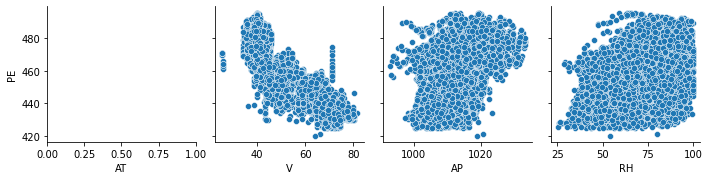

In [ ]:

print(df1.shape)

import seaborn as sns
plot_data=df1

# plot all features vs. the Powerpnat Energy output
f, axes = plt.subplots(1,4, sharey=True, figsize=(20, 4))
sns.scatterplot(x="AT", y="PE", data=plot_data, ax=axes[0])
sns.scatterplot(x="V", y="PE", data=plot_data, ax=axes[1])
sns.scatterplot(x="AP", y="PE", data=plot_data, ax=axes[2])
sns.scatterplot(x="RH", y="PE", data=plot_data, ax=axes[3])

# or alternatively use a for loop for ploting:
i=0
f, axes = plt.subplots(1,4, sharey=True, figsize=(20, 4))
for x_var in ["AT","V","AP","RH"]:
  sns.scatterplot(x_var, y="PE", data=plot_data, ax=axes[i])
  i=i+1

''' # Save the PNG file of the output graphs
from google.colab import files
plt.savefig("P2_Data_Exploration_Graph.png")
files.download("P2_Data_Exploration_Graph.png")'''

# or alternatively plot all at once:
sns.pairplot(data=plot_data,x_vars=["AT","V","AP","RH",],y_vars=["PE"])
pd.options.display.float_format = '${:,.2f}'.format

#Get the statistics of the data
df1.describe()

C) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks? 

      AT  PE_reg
0 $14.96 $464.55
1 $25.18 $442.36
2  $5.11 $485.94
3 $20.86 $451.74
4 $10.82 $473.54
Regression Coefficients for  AT are:  [[-2.17131996]]
Regression intercept for  AT is:  [497.03411989]
[-2.17131996]
       V  PE_reg
0 $41.76 $469.02
1 $62.96 $444.26
2 $39.40 $471.78
3 $57.32 $450.84
4 $37.50 $474.00
Regression Coefficients for  V are:  [[-1.16813513]]
Regression intercept for  V is:  [517.80152631]
[-2.17131996 -1.16813513]
         AP  PE_reg
0 $1,024.07 $470.47
1 $1,020.04 $464.47
2 $1,012.16 $452.73
3 $1,010.24 $449.87
4 $1,009.23 $448.36
Regression Coefficients for  AP are:  [[1.48987167]]
Regression intercept for  AP is:  [-1055.26098898]
[-2.17131996 -1.16813513  1.48987167]
      RH  PE_reg
0 $73.17 $454.30
1 $59.08 $447.88
2 $92.14 $462.95
3 $76.64 $455.88
4 $96.62 $464.99
Regression Coefficients for  RH are:  [[0.4556501]]
Regression intercept for  RH is:  [420.96176616]
[-2.17131996 -1.16813513  1.48987167  0.4556501 ]


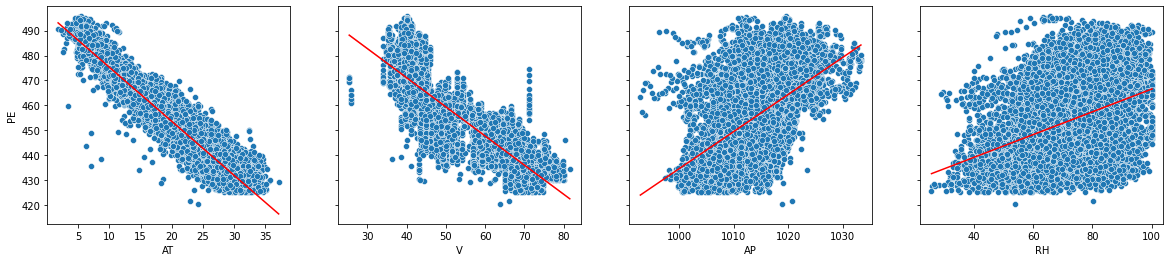

In [ ]:
# Import Linear Regression and pyplot libraries
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Perform regular Linear Regression Analysis on data
i=0
univariate_coef=np.array([[]])
f, axes = plt.subplots(1,4, sharey=True, figsize=(20, 4))
for x_var in ["AT","V","AP","RH"]:
  X_train=df1[[x_var]]
  Y_train=df1[["PE"]]
  reg = LinearRegression().fit(X_train,Y_train)
  Y_predict=reg.predict(X_train)
  Y_predict=pd.DataFrame(Y_predict)
  Y_predict.columns=["PE_reg"]
  df2 = pd.concat([X_train,Y_predict], axis=1)
  print(df2.head())
  print("Regression Coefficients for ",x_var,"are: ",reg.coef_)
  print("Regression intercept for ",x_var,"is: ",reg.intercept_)
  univariate_coef=np.append(univariate_coef,np.array([[reg.coef_]]))
  print(univariate_coef)
  plot_data=df1
  sns.scatterplot(x=x_var, y="PE", data=plot_data, ax=axes[i])
  plot_data=df2
  sns.lineplot(x=x_var, y="PE_reg", data=plot_data, ax=axes[i],color="red")
  i=i+1


Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks? 

      AT      V  PE_reg
0 $14.96 $41.76 $466.43
1 $25.18 $62.96 $442.13
2  $5.11 $39.40 $483.98
3 $20.86 $57.32 $451.33
4 $10.82 $37.50 $474.87
Regression Coefficients for AT are [[-1.70426591 -0.32448652]]
Regression Intercepts AT are [505.47743382]
      AT      V        AP     RH  PE_reg
0 $14.96 $41.76 $1,024.07 $73.17 $467.27
1 $25.18 $62.96 $1,020.04 $59.08 $444.08
2  $5.11 $39.40 $1,012.16 $92.14 $483.56
3 $20.86 $57.32 $1,010.24 $76.64 $450.56
4 $10.82 $37.50 $1,009.23 $96.62 $471.83
Regression Coefficients for multivariate regression are [[-1.97751311 -0.23391642  0.06208294 -0.1580541 ]]
Regression Intercepts multivariate regression is [454.60927432]
Polynomial coefficients based on univariet regression:  [-2.17131996 -1.16813513  1.48987167  0.4556501 ]
The linear model is: Y = 454.61 + -1.9775X_1 + -0.23392X_2 + 0.062083X_3 + -0.15805X_4
Polynomial coefficients based on multivariable regression:  [[-1.97751311 -0.23391642  0.06208294 -0.1580541 ]]


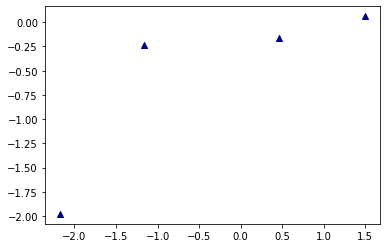

In [ ]:
# Remove the features that don't seem to affect the output and dor the regression again - First the two contributing variables, second all variables.
from sklearn.linear_model import LinearRegression

# "AT and V are considered. AP and RH found to be outliers"
# Multivariate Regression using 2 features only
X_train=df1[["AT","V"]]
Y_train=df1[["PE"]]
reg = LinearRegression(normalize=True).fit(X_train,Y_train)
Y_predict=reg.predict(X_train)
Y_predict=pd.DataFrame(Y_predict)
Y_predict.columns=["PE_reg"]
#print(Y_predict)
df6 = pd.concat([X_train,Y_predict], axis=1)
print(df6.head())
print("Regression Coefficients for AT are",reg.coef_)
print("Regression Intercepts AT are",reg.intercept_)

# Multivariate Regression using all features
X_train=df1[["AT","V","AP","RH"]]
Y_train=df1[["PE"]]
reg = LinearRegression().fit(X_train,Y_train)
Y_predict=reg.predict(X_train)
Y_predict=pd.DataFrame(Y_predict)
Y_predict.columns=["PE_reg"]
#print(Y_predict)
df7 = pd.concat([X_train,Y_predict], axis=1)
print(df7.head())
print("Regression Coefficients for multivariate regression are",reg.coef_)
print("Regression Intercepts multivariate regression is",reg.intercept_)
multivariate_coef=np.array([[]])
multivariate_coef=reg.coef_
print('Polynomial coefficients based on univariet regression: ', univariate_coef)
print("The linear model is: Y = {:.5} + {:.5}X_1 + {:.5}X_2 + {:.5}X_3 + {:.5}X_4".format(reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1], reg.coef_[0][2], reg.coef_[0][3]))
print('Polynomial coefficients based on multivariable regression: ', multivariate_coef)
plt.scatter(univariate_coef,multivariate_coef, color='darkblue', marker='^')

**(f)** Is there evidence of nonlinear association between any of the predictors and the
response? To answer this question, for each predictor X, fit a model of the form


In [ ]:
# Create all nonlinear/polynomial combinations of states up to degree = 3 for your regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=True)
univariate_coef_poly=np.array([[]])
for cols in ["AT","V","AP","RH"]:
    X_train=df1[[cols]]
    Y_train=df1[["PE"]]
    X=X_train
    
    # Transform your 4 column data to polynomial with interations - Degree = 3
    X_poly_train = pd.DataFrame(poly.fit_transform(X))
    print(X_poly_train)

    reg = LinearRegression().fit(X_poly_train,Y_train)
    Y_predict=reg.predict(X_poly_train)
    Y_predict=pd.DataFrame(Y_predict)
    Y_predict.columns=["PE_reg"]
    #print(Y_predict)
    df2 = pd.concat([X_poly_train,Y_predict], axis=1)
    print(df2.head())
    print("Regression Coefficients for this Column are:",reg.coef_)
    print("Regression Intercepts for this Column are: ",reg.intercept_)
    univariate_coef_poly=np.append(univariate_coef_poly,np.array([[reg.coef_]]))

print(univariate_coef_poly)

         0      1       2          3
0    $1.00 $14.96 $223.80  $3,348.07
1    $1.00 $25.18 $634.03 $15,964.94
2    $1.00  $5.11  $26.11    $133.43
3    $1.00 $20.86 $435.14  $9,077.01
4    $1.00 $10.82 $117.07  $1,266.72
...    ...    ...     ...        ...
9563 $1.00 $16.65 $277.22  $4,615.75
9564 $1.00 $13.19 $173.98  $2,294.74
9565 $1.00 $31.32 $980.94 $30,723.12
9566 $1.00 $24.48 $599.27 $14,670.14
9567 $1.00 $21.60 $466.56 $10,077.70

[9568 rows x 4 columns]
      0      1       2          3  PE_reg
0 $1.00 $14.96 $223.80  $3,348.07 $464.55
1 $1.00 $25.18 $634.03 $15,964.94 $440.72
2 $1.00  $5.11  $26.11    $133.43 $486.70
3 $1.00 $20.86 $435.14  $9,077.01 $449.82
4 $1.00 $10.82 $117.07  $1,266.72 $474.86
Regression Coefficients for this Column are: [[ 0.         -0.61034571 -0.12513818  0.00267485]]
Regression Intercepts for this Column are:  [492.72814334]
         0      1         2           3
0    $1.00 $41.76 $1,743.90  $72,825.16
1    $1.00 $62.96 $3,963.96 $249,571.02
2  

**(g)** Is there evidence of association of interactions of predictors with the response? To
answer this question, run a full linear regression model with all pairwise interaction
terms and state whether any interaction terms are statistically signifcant.

See this tutorial: https://towardsdatascience.com/the-complete-guide-to-linear-regression-in-python-3d3f8f06bf8

In [ ]:
# "AP" sounds to be correlated with the output. It is removed and the regression is performed again using polynomials
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=True)
X_train=df1[["AT","V","RH"]]
Y_train=df1[["PE"]]
X=X_train
X_poly_train_all = pd.DataFrame(poly.fit_transform(X))
print(X_poly_train_all)
reg = LinearRegression().fit(X_poly_train_all,Y_train)
Y_predict=reg.predict(X_poly_train_all)
Y_predict=pd.DataFrame(Y_predict)
Y_predict.columns=["PE_reg"]
df2 = pd.concat([X_poly_train,Y_predict], axis=1)
print(df2.head())
print("Regression Coefficients for all pairewiseinteraction terms and states are: ",reg.coef_)
print("Regression Intercepts for all pairewiseinteraction terms and states are: ",reg.intercept_)
univariate_coef_poly_all=np.array([[reg.coef_]])
feature_names=pd.DataFrame(poly.get_feature_names())
print(feature_names)


        0      1      2      3   ...          16          17          18          19
0    $1.00 $14.96 $41.76 $73.17  ...  $72,825.16 $127,600.99 $223,576.73 $391,741.12
1    $1.00 $25.18 $62.96 $59.08  ... $249,571.02 $234,190.85 $219,758.51 $206,215.57
2    $1.00  $5.11 $39.40 $92.14  ...  $61,162.98 $143,034.45 $334,497.32 $782,248.29
3    $1.00 $20.86 $57.32 $76.64  ... $188,329.58 $251,807.04 $336,679.89 $450,159.57
4    $1.00 $10.82 $37.50 $96.62  ...  $52,734.38 $135,871.88 $350,078.42 $901,988.71
...    ...    ...    ...    ...  ...         ...         ...         ...         ...
9563 $1.00 $16.65 $49.69 $91.00  ... $122,689.39 $224,687.75 $411,482.89 $753,571.00
9564 $1.00 $13.19 $39.18 $66.78  ...  $60,144.14 $102,512.13 $174,725.89 $297,809.98
9565 $1.00 $31.32 $74.33 $36.48  ... $410,669.45 $201,550.14  $98,917.65  $48,547.23
9566 $1.00 $24.48 $69.45 $62.39  ... $334,978.36 $300,925.84 $270,334.97 $242,853.83
9567 $1.00 $21.60 $62.52 $67.87  ... $244,375.08 $265,286.89 $287

What interactions are statistically significant?
p-value should be less than 0.05

In [ ]:
# Performing linear regression using statsmodels.api to see the R^2 and p values to decide what terms to eliminate. 
# Only univariate features are used for a toal of 4
from sklearn.metrics import r2_score
import statsmodels.api as sm
X = df1[["AT","V","AP","RH"]].to_numpy()
#X = df1[["AT","V"]].to_numpy()
y = df1[["PE"]].to_numpy()
X2 = sm.add_constant(X)
model = sm.OLS(y, X2)
results = model.fit()
print(results.summary())

# p-value should be less than 0.05

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Mon, 12 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:01:57   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

In [ ]:
# All features and their interactions up to degree=2 are used
from sklearn.metrics import r2_score
import statsmodels.api as sm
X2 = sm.add_constant(X_poly_train_all)
model = sm.OLS(Y_train, X2)
results = model.fit()
print(results.summary())
#print(feature_names)
#selected_features=pd.DataFrame(feature_names.iloc[[2,8,9,10,11,14,16,18,19,21,23,24,25,26,27,28,29,30,33,34],[0]]) # this if for degree=3

# After reviewing results, certain features with low p-value are removed. 
# The remaining features are as follows:
selected_features=pd.DataFrame(feature_names.iloc[[0,2,5,8,11,13,14],[0]])
print(selected_features)

# Performing the liner regression on the selected polynomial features.
# X_train_selected=X_poly_train_all[[2,8,9,10,11,14,16,18,19,21,23,24,25,26,27,28,29,30,33,34]] # this if for degree=3
X_train_selected=X_poly_train_all[[0,2,5,8,11,13,14]]
X2 = sm.add_constant(X_train_selected)
y = df1[["PE"]]
model = sm.OLS(y, X2)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     7496.
Date:                Mon, 12 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:01:57   Log-Likelihood:                -27483.
No. Observations:                9568   AIC:                         5.501e+04
Df Residuals:                    9548   BIC:                         5.515e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0            420.1041     14.535     28.904      0.0

Also, run a regres-sion model involving all possible interaction terms and quadratic nonlinearities,and remove insigni
cant variables using p-values (be careful about interaction
terms).

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
X_train=df1[["AT","V","AP","RH"]]
Y_train=df1[["PE"]]
X=X_train
X_poly_train_all = pd.DataFrame(poly.fit_transform(X))
feature_names=pd.DataFrame(poly.get_feature_names())
print(feature_names)

from sklearn.metrics import r2_score
import statsmodels.api as sm
X2 = sm.add_constant(X_poly_train_all)
model = sm.OLS(Y_train, X2)
results = model.fit()
print(results.summary())

selected_features=pd.DataFrame(feature_names.iloc[[0,1,2,3,4,5,6,8,10,12,13,14],[0]])
print(selected_features)

X_train_selected=X_poly_train_all[[0,1,2,3,4,5,6,8,10,12,13,14]]
X2 = sm.add_constant(X_train_selected)
y = df1[["PE"]]
model = sm.OLS(y, X2)
results = model.fit()
print(results.summary())

        0
0       1
1      x0
2      x1
3      x2
4      x3
5    x0^2
6   x0 x1
7   x0 x2
8   x0 x3
9    x1^2
10  x1 x2
11  x1 x3
12   x2^2
13  x2 x3
14   x3^2
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.030e+04
Date:                Mon, 12 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:01:57   Log-Likelihood:                -27431.
No. Observations:                9568   AIC:                         5.489e+04
Df Residuals:                    9553   BIC:                         5.500e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P

Train the regression model on a
randomly selected 70% subset of the data with all predictors. Test both models on the remaining points and report your train and test
MSEs.

        0      1      2         3   ...        11            12         13        14
0    $1.00 $14.96 $41.76 $1,024.07  ... $3,055.58 $1,048,719.36 $74,931.20 $5,353.85
1    $1.00 $25.18 $62.96 $1,020.04  ... $3,719.68 $1,040,481.60 $60,263.96 $3,490.45
2    $1.00  $5.11 $39.40 $1,012.16  ... $3,630.32 $1,024,467.87 $93,260.42 $8,489.78
3    $1.00 $20.86 $57.32 $1,010.24  ... $4,393.00 $1,020,584.86 $77,424.79 $5,873.69
4    $1.00 $10.82 $37.50 $1,009.23  ... $3,623.25 $1,018,545.19 $97,511.80 $9,335.42
...    ...    ...    ...       ...  ...       ...           ...        ...       ...
9563 $1.00 $16.65 $49.69 $1,014.01  ... $4,521.79 $1,028,216.28 $92,274.91 $8,281.00
9564 $1.00 $13.19 $39.18 $1,023.67  ... $2,616.44 $1,047,900.27 $68,360.68 $4,459.57
9565 $1.00 $31.32 $74.33 $1,012.92  ... $2,711.56 $1,026,006.93 $36,951.32 $1,330.79
9566 $1.00 $24.48 $69.45 $1,013.86  ... $4,332.99 $1,027,912.10 $63,254.73 $3,892.51
9567 $1.00 $21.60 $62.52 $1,017.23  ... $4,243.23 $1,034,756.87 $

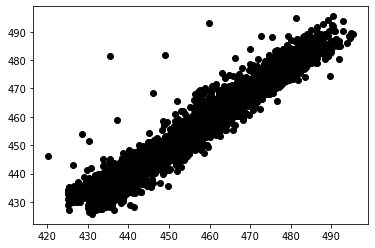

In [ ]:
# Used 70% of data for training and 30% for testing 
from sklearn.model_selection import train_test_split
Y_train=df1[["PE"]]
X_train, X_test, y_train, y_test = train_test_split(X_poly_train_all, Y_train, test_size=0.3, random_state=42,shuffle=False)
print(X_poly_train_all)
X_train=pd.DataFrame(X_train.reset_index(drop=True))
X_test=pd.DataFrame(X_test.reset_index(drop=True))
y_train=pd.DataFrame(y_train.reset_index(drop=True))
y_test=pd.DataFrame(y_test.reset_index(drop=True))

print('X_train: \n',X_train)
print('y_train: \n',y_train)
print('X_test: \n',X_test)
print('y_test: \n',y_test)

# Ran liner regression on all the variable using a LinearRegression library
from sklearn.linear_model import LinearRegression
reg = LinearRegression(normalize=True).fit(X_train,y_train)
y_predict=reg.predict(X_test)
y_predict=pd.DataFrame(y_predict)
y_predict.columns=["PE_reg"]
print(X_test)
print(y_test)
print(y_predict)
#print(Y_predict)
df6 = pd.concat([X_test,y_predict], axis=1)
print(df6)
print("Regression Coefficients for all are",reg.coef_)
print("Regression Intercepts all are",reg.intercept_)

from sklearn.metrics import mean_squared_error
print("MSE of the regression using all states and interactions is: ",mean_squared_error(y_test, y_predict))

import matplotlib.pyplot as plt
plt.plot(y_test,y_predict,'o', color='black')

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     9406.
Date:                Mon, 12 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:01:57   Log-Likelihood:                -19109.
No. Observations:                6697   AIC:                         3.824e+04
Df Residuals:                    6685   BIC:                         3.832e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0          -7787.4146   1241.728     -6.271      0.0

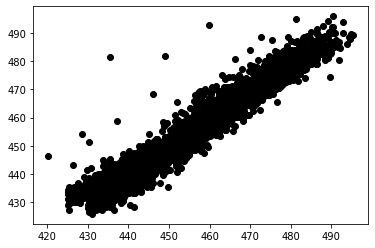

In [ ]:
# Performing the liner regression on the selected polynomial features.
from sklearn.model_selection import train_test_split
Y_train=df1[["PE"]]
X_train_selected=X_poly_train_all[[0,1,2,3,4,5,6,8,10,12,13,14]]
X_train, X_test, y_train, y_test = train_test_split(X_train_selected, Y_train, test_size=0.3, random_state=42,shuffle=False)
X2 = sm.add_constant(X_train)
model = sm.OLS(y_train, X2)
results = model.fit()
print(results.summary())

y_predict=results.predict(X_test)
from sklearn.metrics import mean_squared_error
print("MSE of the regression is: ",mean_squared_error(y_test, y_predict))

import matplotlib.pyplot as plt
plt.plot(y_test,y_predict,'o', color='black')


**i) KNN Regression:**

i. Performk-nearest neighbor regression for this dataset using both normalized
and raw features. Find the value of k: 1,2, ...,100 that gives you the
best fit. Plot the train and test errors in terms of 1/k.

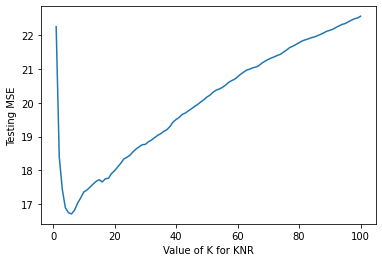

Maximum accuracy is achieved at minimum of MSE  16.71386488834707
[22.244899407871827, 18.403877960640894, 17.43341294941754, 16.893920720132357, 16.749030036920928, 16.71386488834707, 16.8290226373517, 17.037910792189134, 17.18928924751989, 17.36380747788226, 17.41897707539918, 17.50330887079608, 17.593062062782487, 17.675373251693575, 17.723021219087432, 17.65885429184082, 17.751971691861947, 17.764813019079693, 17.905946253730356, 17.990661063479624, 18.09760950201048, 18.207971672913228, 18.33712052491541, 18.385848764887864, 18.446974136732845, 18.547857906343584, 18.632477084930944, 18.696716660757822, 18.758154637440033, 18.767828196369823, 18.845999985574636, 18.893292427779958, 18.965283048239918, 19.03226930436691, 19.082580293291826, 19.153228678789826, 19.201456179181815, 19.294284016663934, 19.42327727179984, 19.503478940134094, 19.564076006635513, 19.652157252661908, 19.692780672806663, 19.758258464705484, 19.81877747102356, 19.8894641752411, 19.94571739716516, 20.0180426

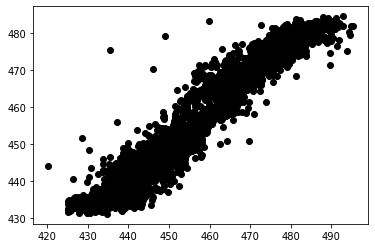

In [ ]:
# Performing the liner regression using K Neighbors Regressor with changing K
# Import metrics model to check the accuracy 
from sklearn import metrics

k_range=range(1,100+1,1)
#for n in k_range:
#   print(n)

MSE = {}
MSE_list = []

X_KNR=df1[["AT","V","AP","RH"]]
Y_KNR=df1[["PE"]]

Y_train=df1[["PE"]]
X_train, X_test, y_train, y_test = train_test_split(X_KNR, Y_KNR, test_size=0.3, random_state=42,shuffle=False)

##print(X_train)
#print(Y_train)

for k in k_range:
  n_neighbors=k
  # import k-nearest neighbor regression library
  from sklearn.neighbors import KNeighborsRegressor
  #KNR = KNeighborsRegressor(n_neighbors=7,weights='uniform')
  KNR = KNeighborsRegressor(n_neighbors,weights='uniform')
  KNR.fit(X_train, y_train)
  y_pred = KNR.predict(X_test)
  y_pred=pd.DataFrame(y_pred)
  y_pred.columns=["PE_reg"]
  from sklearn.metrics import mean_squared_error
  test_error=mean_squared_error(y_test, y_pred)
  #print("MSE of the regression is: ",mean_squared_error(y_test, y_pred))
  MSE_list.append(mean_squared_error(y_test, y_pred))

import matplotlib.pyplot as plt

#Plot the relationship between K and the testing accuracy
plt.plot(k_range,MSE_list)
plt.xlabel('Value of K for KNR')
plt.ylabel('Testing MSE')
plt.show()

import matplotlib.pyplot as plt
plt.plot(y_test,y_pred,'o', color='black')
print('Maximum accuracy is achieved at minimum of MSE ',min(MSE_list))
print(MSE_list)

# Create a boolean list that locates where the score is maximum
bool_MSE_list= MSE_list == min(MSE_list)
print(bool_MSE_list)

# Print the values that match Boolean in the list compressed
from itertools import compress
print(list(compress(MSE_list, bool_MSE_list)))
# Find the locations of where the maximum is happening
min_locations=np.where(bool_MSE_list)[0]
print('Minimum MSE is happening at Locations: ',min_locations)

